In [1]:
from scipy.linalg import solve
from scipy.special import erf
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
# import sklearn
import scipy.io
%matplotlib inline

In [12]:
num_of_var = 10
time_points = 1000

In [13]:
m = np.random.rand(num_of_var, num_of_var)-0.6
x = np.zeros((num_of_var, time_points))
x[:,0] = np.random.rand(1, num_of_var)
std = 0.01
for i in range(1, time_points):
#     x[:, i] = x[:,i-1] + std**2*x[:,i-1].dot(m) + std*np.random.rand(1, num_of_var)
    x[:, i] = x[:,i-1] + std**2*x[:,i-1].dot(m) +  std*np.random.normal(size=num_of_var) 

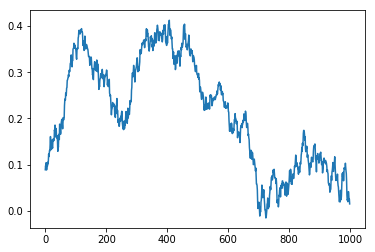

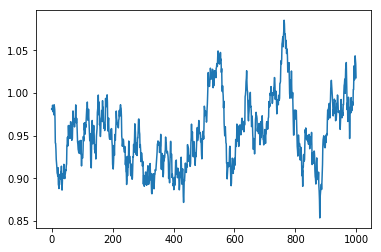

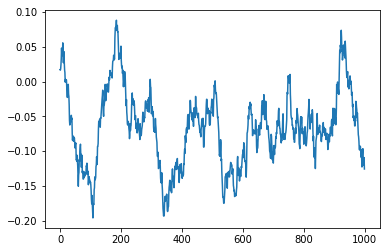

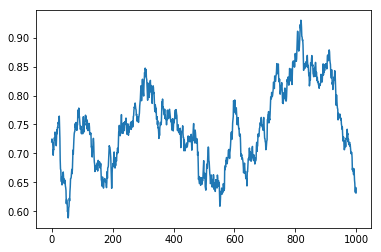

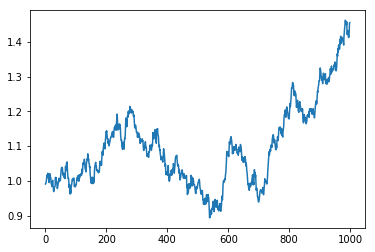

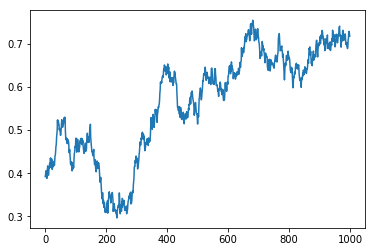

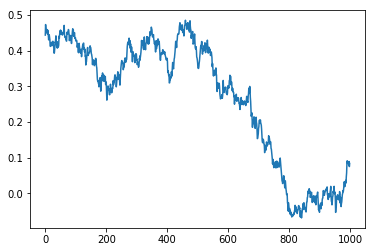

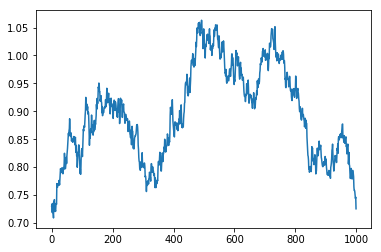

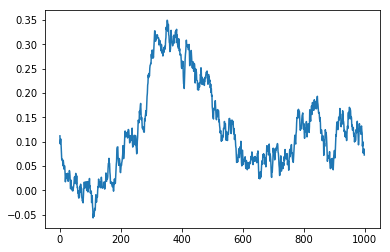

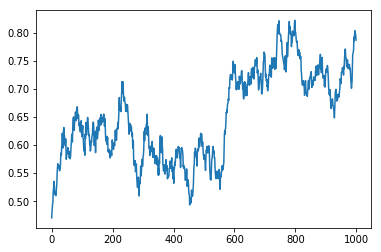

In [14]:
for i in range((x.shape[0])):
    plt.plot(x[i])
    plt.show()

In [15]:
train_frac = 0.8
n_seconds = x.shape[1] #-1 to account for when t=n
t = np.arange(n_seconds)
split = int(n_seconds * train_frac)
t_train, t_test = t[:split], t[split:]
l = float(len(t_train)-1)
t_train1, t_train2 = t_train[:-1], t_train[1:]
t_test1, t_test2 = t_test[:-1], t_test[1:]

In [16]:
def fit(i, x, iters=500, atol=1e-8):
    y = x[i,1:]-x[i,:-1]

    x_train = x[:, t_train]
    x_train1, x_test1 = x[:,t_train1], x[:,t_test1]

    s = np.sign((y[t_train1]))
    c = np.cov(x_train)
#     c = np.cov(x_train1)

    x0 = (x_train1 - x_train.mean(1)[:, np.newaxis]) / l

    w = np.zeros(x.shape[0]) #272 channels
    w[0] = 1

    erf_last = np.inf
    e = []
#     d = []

    for it in range(iters):
        h = w.dot(x_train1)
        
        sig = np.std(y[t_train1] - w.dot(x[:, t_train1]))
        print(sig)
        erf_next = erf(h/(np.sqrt(2)*sig))
#         d.append(np.linalg.norm(y[t_train2]-h/np.sqrt(2))**2)
        ei = np.linalg.norm(erf_next - erf_last) 
        e.append(ei)
        if ei * ei < atol:
            break
        erf_last = erf_next.copy()

        h *= s / erf_next
        
        w = solve(c, x0.dot(h))
    return w, e

In [17]:
res = [fit(i,x) for i in range(x.shape[0])]
w = np.vstack([r[0] for r in res])
e = [r[1] for r in res]

0.11125522151686218
0.040095534538481435
0.013947403527571404
0.01030634928599277
0.010016986089433508
0.009924136044631934
0.009909501539071035
0.00990767468299783
0.009907405734337661
0.009907360023917284
0.009907351850760492
0.009907350363295953
0.009907350091121049
0.00990735004124529
0.11079839155730861
0.03627032233210251
0.10184489602091458
0.11048028642637966
0.03395562260082015
0.05267578857767137
0.11135448946225232
0.03328551246205765
0.07558395760149934
0.11156173029960476
0.04920602936412442
0.12604273801526542
0.11067113802373597
0.04266781096643705
0.047948240868526434
0.11055514982873914
0.035413633889734904
0.1683085158836263
0.11050794033024065
0.02442768933317644
0.011161421990011472
0.010257682587822498
0.010172680613500322
0.010171655753703187
0.010171606391354247
0.010171603667345559
0.010171603590099441
0.11089533846814317
0.036848503574413397
0.040550277170768076
0.11115288057946246
0.043585836982688565
0.26836206288568537


In [18]:
temp = x.shape[0]
train_prediction = np.empty((temp, len(t_train2)))
test_prediction = np.empty((temp, len(t_test2)))
arr = []

for i in range(temp-1):
    y = x[i,1:]-x[i,:-1]
    train_prediction[i] = w[i].dot(x[:,t_train1]) + np.mean(y[t_train1] - w[i].dot(x[:,t_train1]))
    test_prediction[i] = w[i].dot(x[:,t_test1]) + np.mean(y[t_train1] - w[i].dot(x[:,t_train1]))
    arr.append(np.mean(y[t_train1] - w[i].dot(x[:,t_train1])))

#     train_prediction[i][train_prediction[i] < 0] = 0
#     test_prediction[i][test_prediction[i] < 0] = 0
#     train_prediction[i][train_prediction[i] > 1] = 1
#     test_prediction[i][test_prediction[i] > 1] = 1

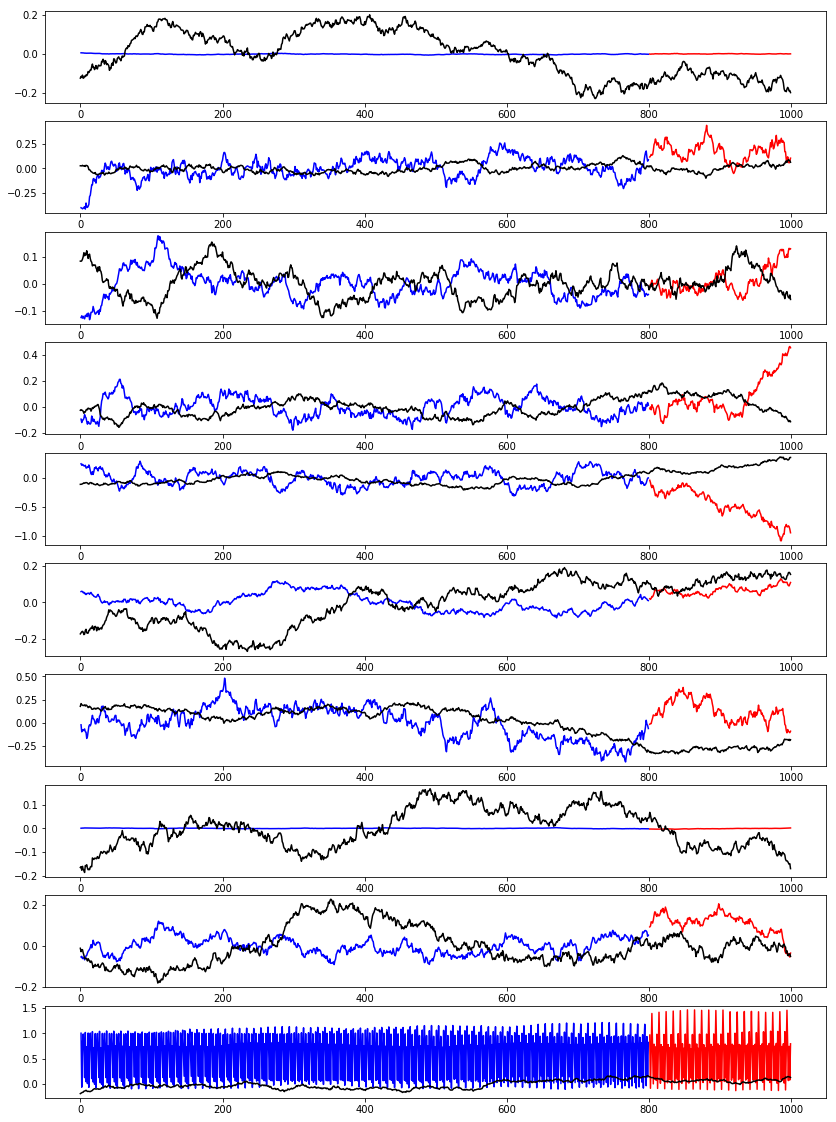

In [19]:
fig, ax = plt.subplots(x.shape[0], 1, figsize=(14, 2*x.shape[0]))
for i in range (x.shape[0]):
    ax[i].plot(t_train2, train_prediction[i], 'b-',
               t_test2, test_prediction[i], 'r-',
               t, x[i]-np.mean(x[i]), 'k-', clip_on=False)
plt.show()

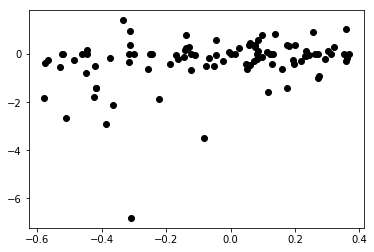

In [21]:
plt.plot(m, w.T,'ko')